Exp-1

In [1]:
import pandas as pd
from io import StringIO

# Sample CSV data
csv_data = """
Sky,Temp,Humidity,Wind,Water,Forecast,PlayTennis
Sunny,Warm,Normal,Strong,Warm,Same,Yes
Sunny,Warm,High,Strong,Warm,Same,Yes
Rainy,Cold,High,Strong,Warm,Change,No
Sunny,Warm,High,Strong,Cool,Change,Yes
"""

# Load the data from the string using StringIO
def load_data_from_string(csv_string):
    """Load training data from a CSV string"""
    return pd.read_csv(StringIO(csv_string))

# Find-S Algorithm to compute the most specific hypothesis
def find_s_algorithm(data):
    """Find-S Algorithm to compute the most specific hypothesis"""
    
    # Extract features and target values
    attributes = data.iloc[:, :-1].values  # All columns except the last (features)
    target = data.iloc[:, -1].values       # Last column (class label)
    
    # Initialize hypothesis with the first positive example
    for i in range(len(target)):
        if target[i].lower() == "yes":  # Assuming 'Yes' indicates a positive class
            hypothesis = list(attributes[i])
            break
    
    # Generalize the hypothesis based on positive examples
    for i in range(len(attributes)):
        if target[i].lower() == "yes":
            for j in range(len(hypothesis)):
                if hypothesis[j] != attributes[i][j]:  
                    hypothesis[j] = '?'  # Generalize different attributes

    return hypothesis

# Load training data from CSV string
data = load_data_from_string(csv_data)

# Run Find-S algorithm
final_hypothesis = find_s_algorithm(data)

# Print the final hypothesis
print("Most Specific Hypothesis:", final_hypothesis)


Most Specific Hypothesis: ['Sunny', 'Warm', '?', 'Strong', '?', '?']


EXP-2 canididate elimination

In [2]:

import pandas as pd

def load_data(filename=None):
    """Load training data from a CSV file or use in-code data."""
    # If filename is provided, load the data from the CSV
    if filename:
        df = pd.read_csv(filename)
    else:
        # In-code data as DataFrame
        data = {
            'Sky': ['Sunny', 'Sunny', 'Rainy', 'Sunny'],
            'Temp': ['Warm', 'Warm', 'Cold', 'Warm'],
            'Humidity': ['Normal', 'High', 'High', 'High'],
            'Wind': ['Strong', 'Strong', 'Strong', 'Strong'],
            'Water': ['Warm', 'Warm', 'Warm', 'Cool'],
            'Forecast': ['Same', 'Same', 'Change', 'Change'],
            'PlayTennis': ['Yes', 'Yes', 'No', 'Yes']
        }
        df = pd.DataFrame(data)
    return df

def initialize_hypotheses(num_attributes):
    """Initialize the most specific and most general hypotheses"""
    specific_hypothesis = ['ϕ'] * num_attributes  # Empty hypothesis
    general_hypothesis = [['?'] * num_attributes]  # List of most general hypotheses
    return specific_hypothesis, general_hypothesis

def is_consistent(h, x):
    """Check if a hypothesis is consistent with a training example"""
    return all(h[i] == '?' or h[i] == x[i] for i in range(len(h)))

def generalize_specific(s, x):
    """Generalize the specific hypothesis (S)"""
    for i in range(len(s)):
        if s[i] == 'ϕ':  
            s[i] = x[i]  # Initialize S with first positive example
        elif s[i] != x[i]:
            s[i] = '?'  # Generalize different attributes
    return s

def specialize_general(g, x):
    """Specialize the general hypothesis (G)"""
    new_general_hypotheses = []
    for gh in g:
        for i in range(len(gh)):
            if gh[i] == '?':
                # Create a specialized version that avoids the negative example
                if x[i] != 'ϕ':  # Ensure not to create an empty hypothesis
                    specialized_hypothesis = gh[:]
                    specialized_hypothesis[i] = x[i]
                    new_general_hypotheses.append(specialized_hypothesis)
    
    # Remove hypotheses that are too specific (inconsistent with S)
    return new_general_hypotheses

def candidate_elimination_algorithm(data):
    """Candidate Elimination Algorithm"""
    
    # Extract attributes and target values
    attributes = data.iloc[:, :-1].values  # Features (except target column)
    target = data.iloc[:, -1].values       # Target class

    # Initialize S and G
    num_attributes = len(attributes[0])
    S, G = initialize_hypotheses(num_attributes)

    # Process training examples
    for i in range(len(attributes)):
        if target[i].lower() == "yes":  # Positive example
            S = generalize_specific(S, attributes[i])  # Generalize S
            G = [gh for gh in G if is_consistent(gh, attributes[i])]  # Remove inconsistent G hypotheses
        else:  # Negative example
            G = specialize_general(G, attributes[i])  # Specialize G

    return S, G

# Load data from the in-code DataFrame (or a CSV file)
data = load_data()  # For in-code data, pass None

# Run Candidate Elimination Algorithm
S_final, G_final = candidate_elimination_algorithm(data)

# Print results
print("Final Specific Hypothesis (S):", S_final)
print("Final General Hypotheses (G):", G_final)


# For Windows:
# Hold down the Alt key.

# Type 981 on the numeric keypad (make sure Num Lock is on).

# Release the Alt key.

# For Linux (Ubuntu or similar):
# Press Ctrl + Shift + U, then type 03C6, and hit Enter.

Final Specific Hypothesis (S): ['Sunny', 'Warm', '?', 'Strong', '?', '?']
Final General Hypotheses (G): [['?', '?', 'High', '?', '?', '?'], ['?', '?', '?', 'Strong', '?', '?'], ['?', '?', '?', '?', '?', 'Change']]


Exp-3 
ID3 algorithm

The accuracy is: 1.0


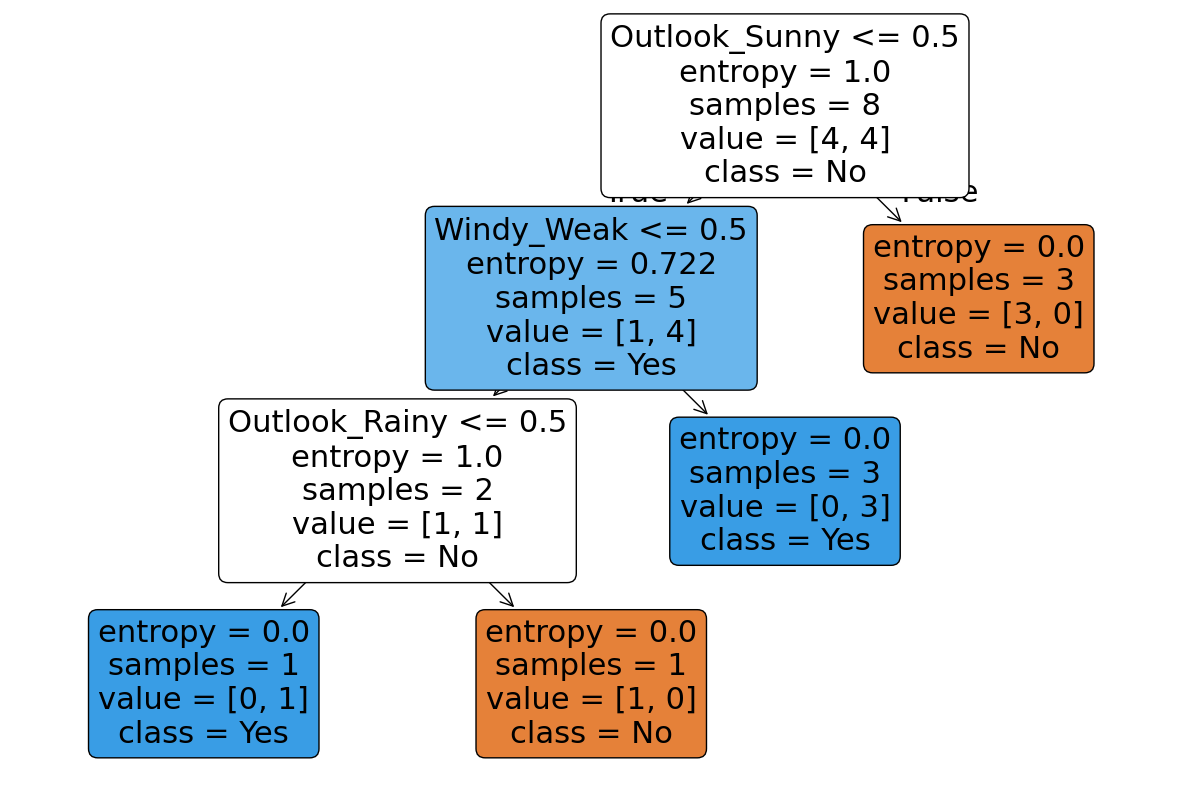

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

# Define the dataset as a dictionary
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High'],
    'Windy': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak'],
    'play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No']
}

# Convert dictionary into DataFrame
df = pd.DataFrame(data)

# Encode categorical variables if needed
X = df.drop('play', axis=1)
y = df['play']

# Convert categorical features to numerical using one-hot encoding
X_encoded = pd.get_dummies(X)

# Create the Decision Tree classifier (ID3)
clf = tree.DecisionTreeClassifier(criterion='entropy')  # ID3 uses entropy
clf.fit(X_encoded, y)

# Make predictions
y_pred = clf.predict(X_encoded)

# Calculate the accuracy
accuracy = metrics.accuracy_score(y, y_pred)
print('The accuracy is:', accuracy)

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X_encoded.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()


Exp-4 linear Regression logistic Regression and binary classifier

Predicted Price for 900 sq.ft house: 195684.9315068493


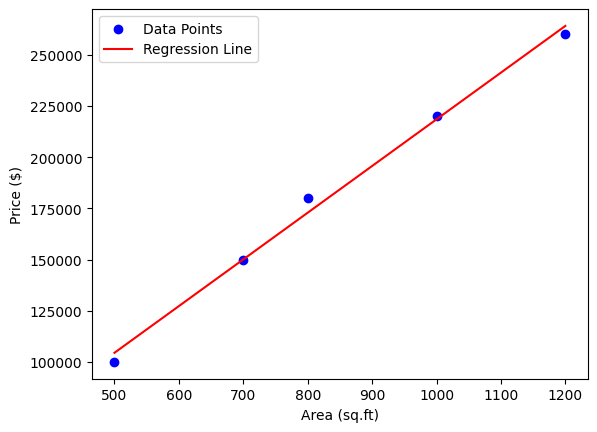

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Example dataset: House prices vs. Area
area = np.array([500, 700, 800, 1000, 1200]).reshape(-1, 1)  # Square feet
price = np.array([100000, 150000, 180000, 220000, 260000])   # Price in $

# Create and train the model
model = LinearRegression()
model.fit(area, price)

# Predict price for a new house with 900 sq.ft
predicted_price = model.predict([[900]])
print("Predicted Price for 900 sq.ft house:", predicted_price[0])

# Plot the regression line
plt.scatter(area, price, color='blue', label="Data Points")
plt.plot(area, model.predict(area), color='red', label="Regression Line")
plt.xlabel("Area (sq.ft)")
plt.ylabel("Price ($)")
plt.legend()
plt.show()


In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Sample dataset: [word_count, spam(1)/not spam(0)]
X = np.array([[10], [50], [100], [200], [300]])  # Word count
y = np.array([0, 0, 1, 1, 1])  # 1 = Spam, 0 = Not Spam

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict if an email with 150 words is spam
prediction = model.predict([[150]])
print("Email with 150 words is classified as:", "Spam" if prediction[0] else "Not Spam")


Email with 150 words is classified as: Spam


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Sample dataset: [petal_length, petal_width, class]
X = np.array([[1.5, 0.2], [1.7, 0.3], [3.0, 1.2], [4.5, 1.5], [5.0, 1.7]])  # Features
y = np.array([1, 1, 0, 0, 0])  # 1 = Setosa, 0 = Versicolor

# Train Support Vector Machine (SVM) classifier
model = SVC(kernel='linear')
model.fit(X, y)

# Predict for a new flower with petal length 2.5, width 0.5
prediction = model.predict([[2.5, 0.5]])
print("Flower is classified as:", "Setosa" if prediction[0] else "Versicolor")


Flower is classified as: Setosa


Exp-8 KNN


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Print feature names
print("Features:", iris.feature_names)
print("Target Classes: 0 - Setosa, 1 - Versicolor, 2 - Virginica\n")

# Show a preview of the data
print("Sample Features:\n", X[:5])  # Print first 5 rows
print("Sample Labels:\n", y[:5])  # Print first 5 labels

# Split dataset (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train k-NN classifier (k=5)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Classes: 0 - Setosa, 1 - Versicolor, 2 - Virginica

Sample Features:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Sample Labels:
 [0 0 0 0 0]

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Exp-5

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Convert to DataFrame and introduce some duplicate rows
df = pd.DataFrame(X, columns=['Feature'])
df['Target'] = y
df = pd.concat([df, df.iloc[:5]])  # Adding duplicates

# Print data before removing duplicates
print("Data before removing duplicates:")
print(df.head(10))

# Remove duplicates
df = df.drop_duplicates().reset_index(drop=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Feature']], df['Target'], test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Perform K-Fold Cross Validation (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute Bias (Mean Squared Error on Training Data)
train_pred = model.predict(X_train)
bias = mean_squared_error(y_train, train_pred)

# Compute Variance (Mean Squared Error on Cross-Validation Data)
variance = -np.mean(cv_scores)  # Since cross_val_score returns negative MSE

# Print Results
print("\nData after removing duplicates:")
print(df.head(10))

print("\nCross-Validation Scores (MSE):", -cv_scores)
print("Mean Cross-Validation Error:", variance)

print("\nBias (Training Error):", bias)
print("Variance (Generalization Error from Cross-Validation):", variance)


Data before removing duplicates:
    Feature     Target
0  0.931280  50.779929
1  0.087047 -10.065270
2 -1.057711 -34.918392
3  0.314247  10.526743
4 -0.479174 -17.738377
5  0.647689  31.564596
6 -0.463418 -30.068883
7  0.542560   5.912007
8  0.611676  23.473374
9  1.003533  32.343595

Data after removing duplicates:
    Feature     Target
0  0.931280  50.779929
1  0.087047 -10.065270
2 -1.057711 -34.918392
3  0.314247  10.526743
4 -0.479174 -17.738377
5  0.647689  31.564596
6 -0.463418 -30.068883
7  0.542560   5.912007
8  0.611676  23.473374
9  1.003533  32.343595

Cross-Validation Scores (MSE): [106.46471375  99.51267281  75.71834521  42.21218551  57.56392893]
Mean Cross-Validation Error: 76.29436924391734

Bias (Training Error): 72.92252788103295
Variance (Generalization Error from Cross-Validation): 76.29436924391734


Exp-6 write a program to implement categorical encoding,one hot encoding

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Sample dataset with categorical features
data = {'Color': ['Red', 'Blue', 'Green', 'Red', 'Green', 'Blue'],
        'Size': ['Small', 'Large', 'Medium', 'Small', 'Large', 'Medium'],
        'Category': ['A', 'B', 'A', 'C', 'B', 'C']}

# Convert to DataFrame
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# 🔹 1. Label Encoding (Replacing Categories with Numbers)
label_encoder = LabelEncoder()
df['Color_Label'] = label_encoder.fit_transform(df['Color'])
df['Size_Label'] = label_encoder.fit_transform(df['Size'])
df['Category_Label'] = label_encoder.fit_transform(df['Category'])

print("\nLabel Encoded DataFrame:")
print(df)

# 🔹 2. One-Hot Encoding (Converting Categories into Binary Columns)
df_one_hot = pd.get_dummies(df[['Color', 'Size', 'Category']], drop_first=True)

print("\nOne-Hot Encoded DataFrame:")
print(df_one_hot)


Original DataFrame:


   Color    Size Category
0    Red   Small        A
1   Blue   Large        B
2  Green  Medium        A
3    Red   Small        C
4  Green   Large        B
5   Blue  Medium        C

Label Encoded DataFrame:
   Color    Size Category  Color_Label  Size_Label  Category_Label
0    Red   Small        A            2           2               0
1   Blue   Large        B            0           0               1
2  Green  Medium        A            1           1               0
3    Red   Small        C            2           2               2
4  Green   Large        B            1           0               1
5   Blue  Medium        C            0           1               2

One-Hot Encoded DataFrame:
   Color_Green  Color_Red  Size_Medium  Size_Small  Category_B  Category_C
0        False       True        False        True       False       False
1        False      False        False       False        True       False
2         True      False         True       False       False       F

EXP-9 LWR

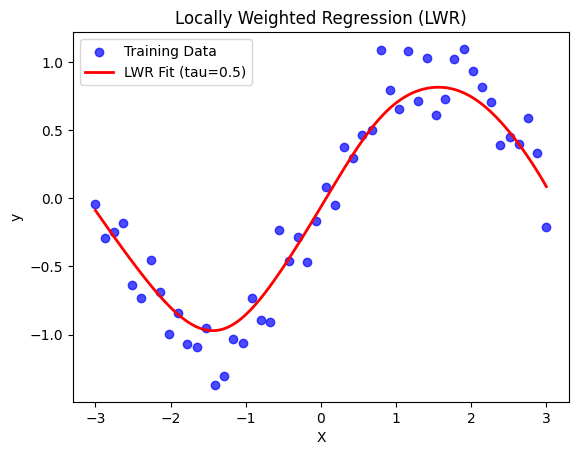

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Step 1: Generate Sample Dataset
np.random.seed(42)
X = np.linspace(-3, 3, 50)  # Generate 50 points between -3 and 3
y = np.sin(X) + np.random.normal(0, 0.2, X.shape)  # Add noise

# Convert to column vector (required for matrix operations)
X = X.reshape(-1, 1)

# 🔹 Step 2: Define the Locally Weighted Regression Function
def locally_weighted_regression(X_train, y_train, X_test, tau=0.5):
    m = X_train.shape[0]
    y_pred = np.zeros(len(X_test))

    for i, x in enumerate(X_test):
        # Compute Weights using Gaussian Kernel
        weights = np.exp(-np.sum((X_train - x) ** 2, axis=1) / (2 * tau ** 2))
        W = np.diag(weights)  # Convert weights to a diagonal matrix
        
        # Compute Theta using Normal Equation: θ = (X^T W X)^-1 (X^T W y)
        X_b = np.c_[np.ones((m, 1)), X_train]  # Add bias term (1) for intercept
        theta = np.linalg.inv(X_b.T @ W @ X_b) @ (X_b.T @ W @ y_train)
        
        # Predict value for x
        x_b = np.array([1, x[0]])  # Add bias term for test input
        y_pred[i] = x_b @ theta

    return y_pred

# 🔹 Step 3: Make Predictions using LWR
X_test = np.linspace(-3, 3, 100).reshape(-1, 1)  # Test points for smooth curve
y_pred = locally_weighted_regression(X, y, X_test, tau=0.5)  # Predict with tau = 0.5

# 🔹 Step 4: Plot Results
plt.scatter(X, y, color='blue', label='Training Data', alpha=0.7)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='LWR Fit (tau=0.5)')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Locally Weighted Regression (LWR)")
plt.legend()
plt.show()


Exp-10 Naive Bayes


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

# 🔹 Step 1: Define a Small Dataset (Documents & Labels)
documents = [
    "The sky is blue and beautiful",
    "Love this beautiful and bright day",
    "The quick brown fox jumps over the lazy dog",
    "A fast-moving dog jumps high",
    "Go for a run in the park",
    "Running and jogging are great exercises",
    "The weather is nice today",
    "She loves jogging every morning",
]

labels = ["weather", "weather", "animals", "animals", "sports", "sports", "weather", "sports"]

# 🔹 Step 2: Convert Text into Numerical Representation (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)  # Transform text into TF-IDF features

# 🔹 Step 3: Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# 🔹 Step 4: Train Naïve Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# 🔹 Step 5: Make Predictions
y_pred = nb_classifier.predict(X_test)

# 🔹 Step 6: Calculate Accuracy, Precision, and Recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# 🔹 Step 7: Print Results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.3333333333333333
Precision: 0.1111111111111111
Recall: 0.3333333333333333


/home/veda/Documents/Learn/ML_Lab/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Exp-11 EM algo

Silhouette Score for K-Means: 0.5715
Silhouette Score for EM (GMM): 0.5715


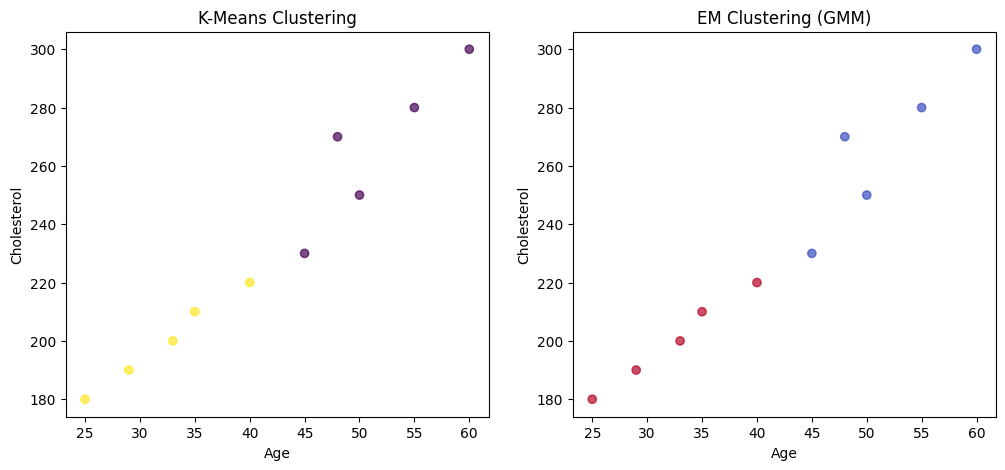

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 🔹 Step 1: Create a Custom Heart Disease Dataset
data = {
    "age": [25, 45, 35, 50, 29, 55, 40, 60, 48, 33],
    "cholesterol": [180, 230, 210, 250, 190, 280, 220, 300, 270, 200],
    "blood_pressure": [120, 140, 130, 150, 125, 160, 135, 170, 155, 128],
    "heart_rate": [70, 85, 78, 90, 72, 95, 80, 100, 92, 75],
}

df = pd.DataFrame(data)

# 🔹 Step 2: Normalize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 🔹 Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# 🔹 Step 4: Apply EM Algorithm (Gaussian Mixture Model - GMM)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# 🔹 Step 5: Compare Clustering Results Using Silhouette Score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)

print(f"Silhouette Score for K-Means: {kmeans_silhouette:.4f}")
print(f"Silhouette Score for EM (GMM): {gmm_silhouette:.4f}")

# 🔹 Step 6: Visualize the Clustering Results
plt.figure(figsize=(12, 5))

# K-Means Clustering Plot
plt.subplot(1, 2, 1)
plt.scatter(df["age"], df["cholesterol"], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("K-Means Clustering")

# EM (GMM) Clustering Plot
plt.subplot(1, 2, 2)
plt.scatter(df["age"], df["cholesterol"], c=gmm_labels, cmap='coolwarm', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("EM Clustering (GMM)")

plt.show()


Exp-12 EDA


✅ First 5 rows of the dataset:
   age  salary loan_status
0   22   20000          No
1   25   25000          No
2   47   50000         Yes
3   52   60000         Yes
4   46   55000         Yes

✅ Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          10 non-null     int64 
 1   salary       10 non-null     int64 
 2   loan_status  10 non-null     object
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes
None

✅ Summary Statistics:
             age       salary
count  10.000000     10.00000
mean   44.500000  53500.00000
std    13.906433  22117.11253
min    22.000000  20000.00000
25%    36.250000  41250.00000
50%    46.500000  52500.00000
75%    55.000000  71250.00000
max    62.000000  85000.00000

✅ Class Distribution (Value Counts for Classification Target):
loan_status
Yes    6
No     4
Name: count, dtype: int64


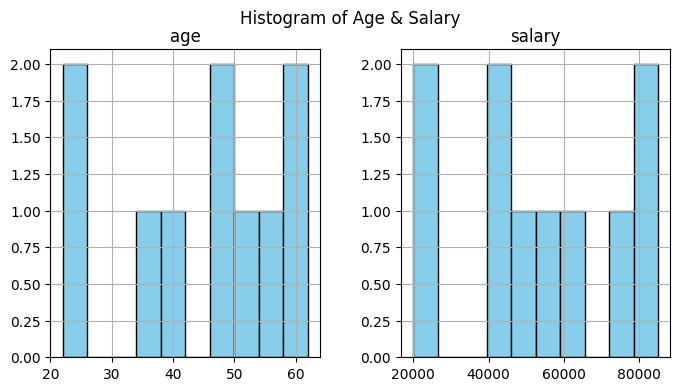

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Step 1: Create a Custom Classification Dataset
data = {
    "age": [22, 25, 47, 52, 46, 56, 60, 62, 35, 40],
    "salary": [20000, 25000, 50000, 60000, 55000, 75000, 80000, 85000, 40000, 45000],
    "loan_status": ["No", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "No"]  # Target variable
}

df = pd.DataFrame(data)

# 🔹 Step 2: Basic Data Exploration
print("\n✅ First 5 rows of the dataset:")
print(df.head())

print("\n✅ Dataset Information:")
print(df.info())

print("\n✅ Summary Statistics:")
print(df.describe())

print("\n✅ Class Distribution (Value Counts for Classification Target):")
print(df["loan_status"].value_counts())

# 🔹 Step 3: Visualizing Data

# Histogram for Age and Salary
df.hist(figsize=(8, 4), color='skyblue', edgecolor='black')
plt.suptitle("Histogram of Age & Salary")
plt.show()


EXP-7 ANN


In [14]:
import numpy as np

# 🔹 Step 1: Sigmoid Activation and Its Derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)  # Derivative of sigmoid

# 🔹 Step 2: Create a Custom Dataset (X: Features, y: Target)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input (XOR dataset)
y = np.array([[0], [1], [1], [0]])  # Output

# 🔹 Step 3: Initialize Weights and Biases
np.random.seed(42)  # For reproducibility
input_layer_neurons = 2   # Input features
hidden_layer_neurons = 4  # Hidden layer neurons
output_layer_neurons = 1  # Output neurons

# Random weight initialization
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_layer_neurons))

bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))
bias_output = np.random.uniform(size=(1, output_layer_neurons))

# 🔹 Step 4: Training the ANN Using Backpropagation
epochs = 10000  # Number of iterations
learning_rate = 0.1  # Learning rate

for epoch in range(epochs):
    # Forward Propagation
    hidden_layer_activation = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_activation)

    # Compute Error
    error = y - predicted_output

    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    d_hidden_layer = d_predicted_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    # Updating Weights and Biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Print loss at every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {np.mean(np.abs(error))}")

# 🔹 Step 5: Test the Trained ANN
print("\n✅ Final Predictions on Training Data:")
print(predicted_output.round())  # Round predictions to 0 or 1


Epoch 0, Loss: 0.49721892454240146
Epoch 1000, Loss: 0.4880611702611545
Epoch 2000, Loss: 0.4214064720875955
Epoch 3000, Loss: 0.34147614865219594
Epoch 4000, Loss: 0.21182296553191782
Epoch 5000, Loss: 0.12925272319332745
Epoch 6000, Loss: 0.09344799285513186
Epoch 7000, Loss: 0.0746404665324282
Epoch 8000, Loss: 0.0630675637733985
Epoch 9000, Loss: 0.05518490381142585

✅ Final Predictions on Training Data:
[[0.]
 [1.]
 [1.]
 [0.]]
